In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
#preprocess the data, return single-dimensional arrays for train and test data set
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

In [ ]:
sunspots='https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots)

In [ ]:
#reshaping data
#total_samples x time_steps x features

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

print(trainX.shape)
print(testX.shape)

(225, 10, 1)
(56, 10, 1)


In [ ]:
def create_RNN(hidden_units, dense_units,input_shape,activation):
    model=Sequential()
    model.add(SimpleRNN(hidden_units,input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units,activation=activation[1]))
    model.compile(loss='mean_squared_error',optimizer='rmsprop')
    return model

In [ ]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh','tanh'])
model.fit(trainX,trainY, epochs=20,batch_size=1, verbose=2)

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))  

In [ ]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY,testY,train_predict,test_predict)

2/2 [==============================] - 0s 14ms/step
Train RMSE: 0.059 RMSE
Test RMSE: 0.089 RMSE


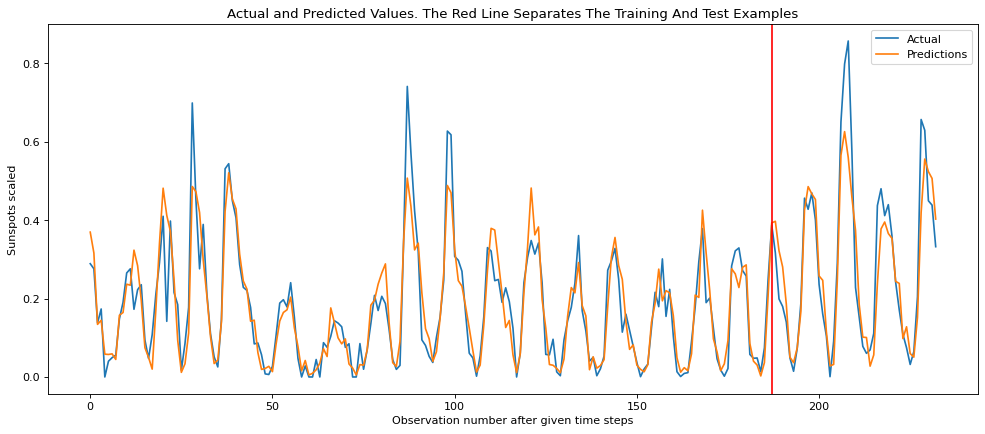

In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)